# C) DJI ML - Descriptive analysis:

In [1]:
#imports
import yfinance as yf
import numpy as np
import pandas as pd
import os
import exchange_calendars as xcals
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from itertools import product
from bayes_opt import BayesianOptimization

In [2]:
#Load data
base_path="C:\\Users\\tgsog\\OneDrive\\Desktop\\DowJones_ML_project\\DataFiles\\"
df =pd.read_csv(base_path+"stock_clean_data_fin.csv")



## 2.1 Biggest stock on the index descriptive analysis:

### 2.1.1 Descriptive statistics

In [3]:
#Inspecting data types
print("All data types are float64")
df.info()

All data types are float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Columns: 212 entries, High_AAPL to sentiment
dtypes: float64(181), int64(31)
memory usage: 528.5 KB


In [4]:
df

High_AAPL  High_AMGN  High_AMZN  High_AXP   High_BA  High_CAT  High_CRM  \
0     0.002150   0.003878  -0.011121  0.008874  0.024006  0.002619 -0.003050   
1     0.005286   0.005664   0.006368  0.016508  0.000845  0.010889  0.026471   
2    -0.009214   0.009138  -0.010839  0.014521  0.035602 -0.000318  0.090713   
3     0.006515   0.007503   0.002178  0.018520  0.010215  0.023618  0.043287   
4    -0.007883   0.003082  -0.012903  0.005564 -0.001869 -0.007419 -0.031545   
..         ...        ...        ...       ...       ...       ...       ...   
314   0.008014   0.012507   0.006537  0.007938  0.011911  0.009423  0.003609   
315  -0.016227   0.023489  -0.033690 -0.038522 -0.056166 -0.046618 -0.037681   
316  -0.014662  -0.002752   0.015377 -0.019365 -0.024053  0.022867  0.003532   
317   0.005538  -0.000815  -0.020049 -0.013840 -0.009980  0.007069  0.018450   
318   0.014757   0.029842  -0.017009 -0.028317 -0.026615  0.029862 -0.032776   

     High_CSCO  High_CVX  High_DIS  ...  Close_USDJPY=X  Close_USDMXN=X  \
0    -0.003721  0.011739 -0.006267  ...       -0.007481        0.002614   
1     0.005188 -0.000205 -0.019971  ...       -0.009357       -0.002191   
2     0.001239 -0.003277  0.006650  ...       -0.000163        0.009450   
3     0.005773  0.003424 -0.010867  ...        0.006529        0.005410   
4    -0.012300 -0.005529 -0.004632  ...       -0.010851       -0.010793   
..         ...       ...       ...  ...             ...             ...   
314   0.011222  0.008949  0.013685  ...        0.005060        0.002779   
315  -0.014951 -0.037104 -0.028559  ...       -0.009723        0.010298   
316   0.004225 -0.018034 -0.011670  ...        0.003309       -0.009418   
317  -0.002493  0.012948 -0.019019  ...       -0.006015       -0.006221   
318   0.002343  0.026870 -0.028117  ...       -0.005306       -0.006119   

     Close_ZC=F  Close_ZW=F  Close_^FVX  Close_^IRX  Close_^TNX  Close_^TYX  \
0     -0.008782    0.017782   -0.028779    0.000380   -0.012076   -0.001985   
1     -0.003876    0.022529   -0.015632   -0.003802   -0.014991   -0.016136   
2      0.026681    0.025629    0.018725   -0.000382    0.018965    0.013929   
3      0.005956    0.011837   -0.033039   -0.004391   -0.028952   -0.021050   
4     -0.009150    0.032496    0.019730    0.001534    0.014671    0.004527   
..          ...         ...         ...         ...         ...         ...   
314   -0.029217   -0.009311   -0.009186    0.000000   -0.012054   -0.011515   
315   -0.009654   -0.025376    0.003007    0.000477    0.007177    0.011873   
316    0.009748    0.023626    0.013240    0.002384    0.013064    0.008855   
317    0.021011    0.011776    0.001233   -0.001902    0.004924    0.005047   
318    0.012792   -0.006052    0.007880    0.000000    0.007233    0.007860   

     Close_^VIX  sentiment  
0      0.000000   1.000000  
1      0.022853  -1.000000  
2     -0.004622   0.091909  
3     -0.022446  -1.000000  
4      0.035629  -1.000000  
..          ...        ...  
314    0.160469   1.000000  
315    0.032046   1.000000  
316   -0.067205   1.000000  
317    0.134063   0.243465  
318   -0.060314   0.996709  

[319 rows x 212 columns]

In [5]:
#Creating data frames for specific prices
df_close = df[[col for col in df.columns if "Close" in col]]
df_high = df[[col for col in df.columns if "High" in col]]
df_low = df[[col for col in df.columns if "Low" in col]]
df_volume =df[[col for col in df.columns if "Volume" in col]]

In [6]:
df_low.describe()

Low_AAPL    Low_AMGN    Low_AMZN     Low_AXP      Low_BA     Low_CAT  \
count  319.000000  319.000000  319.000000  319.000000  319.000000  319.000000   
mean     0.000811    0.000872    0.001013    0.001660   -0.000984    0.001194   
std      0.014850    0.016924    0.018082    0.014167    0.020019    0.015961   
min     -0.099720   -0.121635   -0.117227   -0.066393   -0.080815   -0.079632   
25%     -0.006043   -0.005493   -0.008524   -0.004700   -0.010628   -0.006229   
50%      0.001921    0.001222    0.002345    0.002853    0.000274    0.002404   
75%      0.008576    0.007527    0.010811    0.009444    0.010387    0.009702   
max      0.068875    0.122881    0.075247    0.057598    0.050112    0.075496   

          Low_CRM    Low_CSCO     Low_CVX     Low_DIS  ...  Low_USDINR=X  \
count  319.000000  319.000000  319.000000  319.000000  ...    319.000000   
mean     0.000907    0.000991    0.000465    0.000418  ...      0.000171   
std      0.021855    0.010132    0.011663    0.014218  ...      0.009044   
min     -0.208276   -0.050113   -0.050109   -0.087078  ...     -0.091037   
25%     -0.007765   -0.003970   -0.005731   -0.004890  ...     -0.000551   
50%      0.001201    0.001690    0.001415    0.001026  ...      0.000084   
75%      0.011755    0.006480    0.007494    0.007583  ...      0.000692   
max      0.101962    0.069272    0.033327    0.105133  ...      0.104156   

       Low_USDJPY=X  Low_USDMXN=X    Low_ZC=F    Low_ZW=F    Low_^FVX  \
count    319.000000    319.000000  319.000000  319.000000  319.000000   
mean      -0.000014      0.000565    0.000035    0.000158   -0.000213   
std        0.006644      0.007119    0.012264    0.015597    0.015203   
min       -0.032283     -0.019443   -0.055623   -0.047641   -0.064407   
25%       -0.003058     -0.003209   -0.007356   -0.009792   -0.008414   
50%        0.001061      0.000147    0.000000    0.000442    0.000000   
75%        0.003686      0.003532    0.006290    0.009417    0.008486   
max        0.019515      0.037298    0.072178    0.043478    0.060804   

         Low_^IRX    Low_^TNX    Low_^TYX    Low_^VIX  
count  319.000000  319.000000  319.000000  319.000000  
mean    -0.000726   -0.000040    0.000068    0.003701  
std      0.006117    0.013469    0.011666    0.061780  
min     -0.028952   -0.043632   -0.035026   -0.245739  
25%     -0.002257   -0.008449   -0.006700   -0.023501  
50%     -0.000435   -0.000523    0.000000   -0.005025  
75%      0.001340    0.007538    0.006812    0.024477  
max      0.031161    0.057371    0.043489    0.388889  

[8 rows x 60 columns]

In [7]:
df_high.describe()

High_AAPL   High_AMGN   High_AMZN    High_AXP     High_BA    High_CAT  \
count  319.000000  319.000000  319.000000  319.000000  319.000000  319.000000   
mean     0.000855    0.000908    0.001077    0.001737   -0.000850    0.001293   
std      0.013997    0.016051    0.015724    0.013524    0.018594    0.016463   
min     -0.062138   -0.057110   -0.114533   -0.056693   -0.082178   -0.075551   
25%     -0.006776   -0.006344   -0.007848   -0.004076   -0.010874   -0.006466   
50%      0.001692    0.000282    0.000938    0.001517   -0.000596    0.001297   
75%      0.007404    0.007504    0.009803    0.008441    0.009111    0.009322   
max      0.078307    0.157808    0.079745    0.087294    0.057807    0.083482   

         High_CRM   High_CSCO    High_CVX    High_DIS  ...  High_USDINR=X  \
count  319.000000  319.000000  319.000000  319.000000  ...     319.000000   
mean     0.001002    0.001074    0.000499    0.000473  ...       0.000141   
std      0.021013    0.011554    0.011854    0.015845  ...       0.002042   
min     -0.175102   -0.030932   -0.046771   -0.077476  ...      -0.019538   
25%     -0.008253   -0.004552   -0.005926   -0.006368  ...      -0.000562   
50%      0.000973    0.001142    0.001027    0.000350  ...      -0.000002   
75%      0.008975    0.005977    0.007608    0.007418  ...       0.000722   
max      0.108774    0.099257    0.042522    0.135878  ...       0.018115   

       High_USDJPY=X  High_USDMXN=X   High_ZC=F   High_ZW=F   High_^FVX  \
count     319.000000     319.000000  319.000000  319.000000  319.000000   
mean       -0.000014       0.000571    0.000005    0.000044   -0.000175   
std         0.006025       0.009565    0.011534    0.017564    0.013747   
min        -0.025680      -0.036595   -0.042363   -0.060388   -0.064547   
25%        -0.002578      -0.004493   -0.007094   -0.011849   -0.008780   
50%         0.000129      -0.000573   -0.000541   -0.001232   -0.000853   
75%         0.003019       0.004574    0.006476    0.010100    0.008006   
max         0.024131       0.050754    0.052174    0.062203    0.049750   

        High_^IRX   High_^TNX   High_^TYX   High_^VIX  
count  319.000000  319.000000  319.000000  319.000000  
mean    -0.000713   -0.000018    0.000076    0.007640  
std      0.003029    0.012433    0.011028    0.116878  
min     -0.027789   -0.048437   -0.035623   -0.471018  
25%     -0.001665   -0.008553   -0.007537   -0.035821  
50%     -0.000385   -0.001062    0.000000   -0.004367  
75%      0.000954    0.007894    0.007647    0.037504  
max      0.007885    0.039126    0.031844    1.216116  

[8 rows x 60 columns]

In [8]:
df_volume.describe()

Volume_AAPL   Volume_AMGN   Volume_AMZN    Volume_AXP     Volume_BA  \
count  3.190000e+02  3.190000e+02  3.190000e+02  3.190000e+02  3.190000e+02   
mean   5.608553e+07  2.735279e+06  4.105436e+07  2.842809e+06  8.919352e+06   
std    2.860626e+07  1.598507e+06  1.590928e+07  1.214896e+06  6.449869e+06   
min    2.323470e+07  1.000700e+06  1.500750e+07  8.629000e+05  2.764800e+06   
25%    4.156550e+07  1.849350e+06  3.091660e+07  2.124100e+06  5.236850e+06   
50%    4.932950e+07  2.370500e+06  3.785350e+07  2.590800e+06  7.213900e+06   
75%    6.174425e+07  3.173350e+06  4.516610e+07  3.221100e+06  1.014700e+07   
max    3.186799e+08  1.701030e+07  1.414484e+08  1.355540e+07  6.638770e+07   

         Volume_CAT    Volume_CRM   Volume_CSCO    Volume_CVX    Volume_DIS  \
count  3.190000e+02  3.190000e+02  3.190000e+02  3.190000e+02  3.190000e+02   
mean   2.569196e+06  6.524418e+06  1.939029e+07  8.025649e+06  1.048477e+07   
std    1.084622e+06  5.091711e+06  7.963665e+06  3.337064e+06  5.912740e+06   
min    8.860000e+05  1.811000e+06  8.118300e+06  3.264200e+06  2.475000e+06   
25%    1.881800e+06  4.168550e+06  1.511840e+07  6.075400e+06  7.439000e+06   
50%    2.280900e+06  5.221400e+06  1.788020e+07  7.296600e+06  9.134200e+06   
75%    2.995650e+06  7.026350e+06  2.058080e+07  8.921150e+06  1.166880e+07   
max    8.891500e+06  6.686090e+07  6.954460e+07  3.220920e+07  6.055840e+07   

       ...    Volume_NKE   Volume_NVDA     Volume_PG    Volume_SHW  \
count  ...  3.190000e+02  3.190000e+02  3.190000e+02  3.190000e+02   
mean   ...  1.177208e+07  3.645053e+08  6.835993e+06  1.647779e+06   
std    ...  9.173660e+06  1.561448e+08  2.757735e+06  1.103098e+06   
min    ...  4.219800e+06  1.051570e+08  2.460800e+06  4.459000e+05   
25%    ...  7.810350e+06  2.402011e+08  5.240400e+06  1.146200e+06   
50%    ...  9.711300e+06  3.392464e+08  6.249200e+06  1.480900e+06   
75%    ...  1.279300e+07  4.479466e+08  7.605550e+06  1.838150e+06   
max    ...  1.299670e+08  1.142269e+09  2.864750e+07  1.652180e+07   

         Volume_TRV    Volume_UNH      Volume_V     Volume_VZ    Volume_WMT  \
count  3.190000e+02  3.190000e+02  3.190000e+02  3.190000e+02  3.190000e+02   
mean   1.319848e+06  4.174405e+06  6.728779e+06  1.933582e+07  1.793546e+07   
std    5.673789e+05  2.571045e+06  3.447817e+06  7.892490e+06  9.115635e+06   
min    3.292000e+05  1.390800e+06  2.085100e+06  6.653900e+06  6.287500e+06   
25%    9.712500e+05  2.707650e+06  4.778500e+06  1.455920e+07  1.255630e+07   
50%    1.209700e+06  3.387000e+06  5.940900e+06  1.748960e+07  1.546430e+07   
75%    1.477150e+06  4.647100e+06  7.466300e+06  2.193580e+07  1.988405e+07   
max    5.764800e+06  2.273420e+07  2.781090e+07  5.498580e+07  7.436580e+07   

        Volume_^DJI  
count  3.190000e+02  
mean   4.029952e+08  
std    1.509871e+08  
min    1.995500e+08  
25%    3.066650e+08  
50%    3.544300e+08  
75%    4.546100e+08  
max    1.230150e+09  

[8 rows x 31 columns]

### 2.1.2 Visualizations

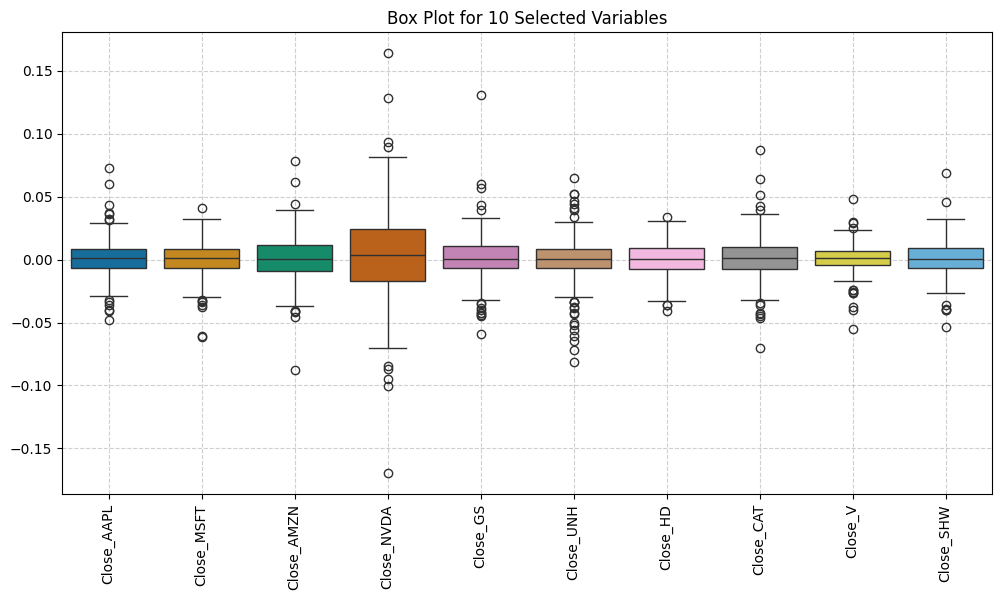

In [9]:
top_10_dow_jones_close = [
    "Close_AAPL",  # Apple Inc.
    "Close_MSFT",  # Microsoft Corp.
    "Close_AMZN",  # Amazon.com, Inc.
    "Close_NVDA",  # NVIDIA Corporation
    "Close_GS",    # Goldman Sachs Group Inc.
    "Close_UNH",   # UnitedHealth Group Inc.
    "Close_HD",    # Home Depot Inc.
    "Close_CAT",   # Caterpillar Inc.
    "Close_V",     # Visa Inc.
    "Close_SHW"    # Sherwin-Williams Co.
]

# ✅ Plot the Box Plot for Selected Variables
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[top_10_dow_jones_close],palette="colorblind")
plt.xticks(rotation=90)
plt.title("Box Plot for 10 Selected Variables")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()



#### Volume graphs

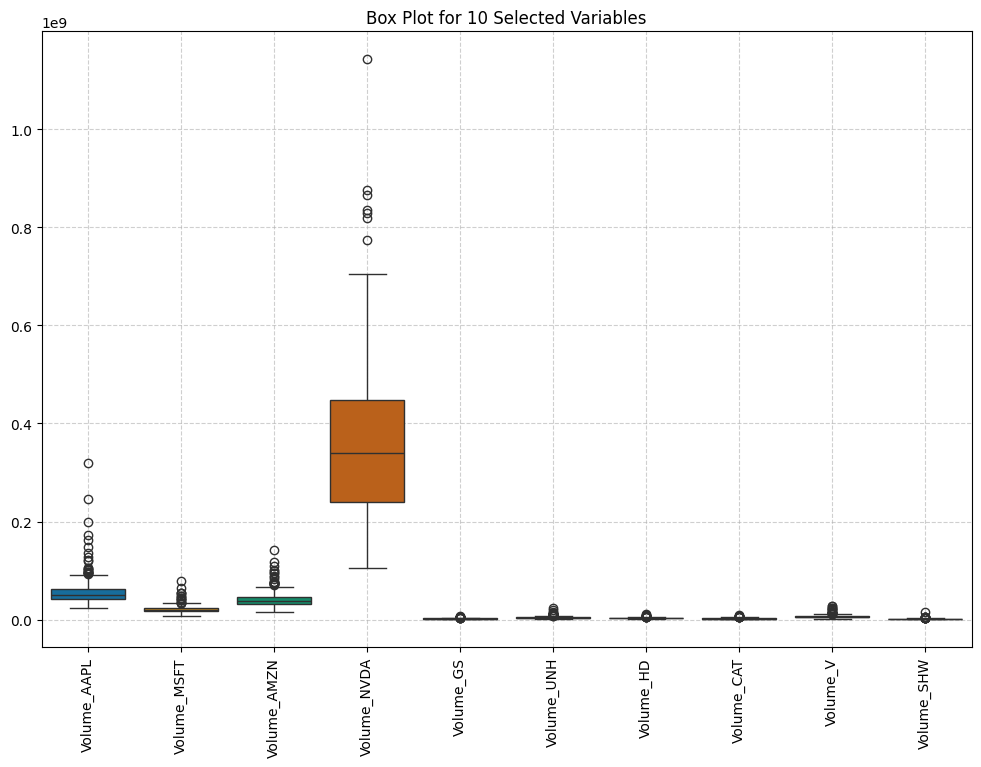

In [10]:
top_10_dow_jones_volume = [
    "Volume_AAPL",  # Apple Inc.
    "Volume_MSFT",  # Microsoft Corp.
    "Volume_AMZN",  # Amazon.com, Inc.
    "Volume_NVDA",  # NVIDIA Corporation
    "Volume_GS",    # Goldman Sachs Group Inc.
    "Volume_UNH",   # UnitedHealth Group Inc.
    "Volume_HD",    # Home Depot Inc.
    "Volume_CAT",   # Caterpillar Inc.
    "Volume_V",     # Visa Inc.
    "Volume_SHW"    # Sherwin-Williams Co.
]
# ✅ Plot the Box Plot for Selected Variables
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[top_10_dow_jones_volume],palette="colorblind")
plt.xticks(rotation=90)
plt.title("Box Plot for 10 Selected Variables")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [11]:
print("Boxplot Volume comment 1:\nAs we see the volume is almost impossible to gauge, how much the other non-Nvidia, stocks are faring.\n Therefore we need to scale the y axis.\n This also means that we probably should scale/ normalize all Volume variables")

Boxplot Volume comment 1:
As we see the volume is almost impossible to gauge, how much the other non-Nvidia, stocks are faring.
 Therefore we need to scale the y axis.
 This also means that we probably should scale/ normalize all Volume variables


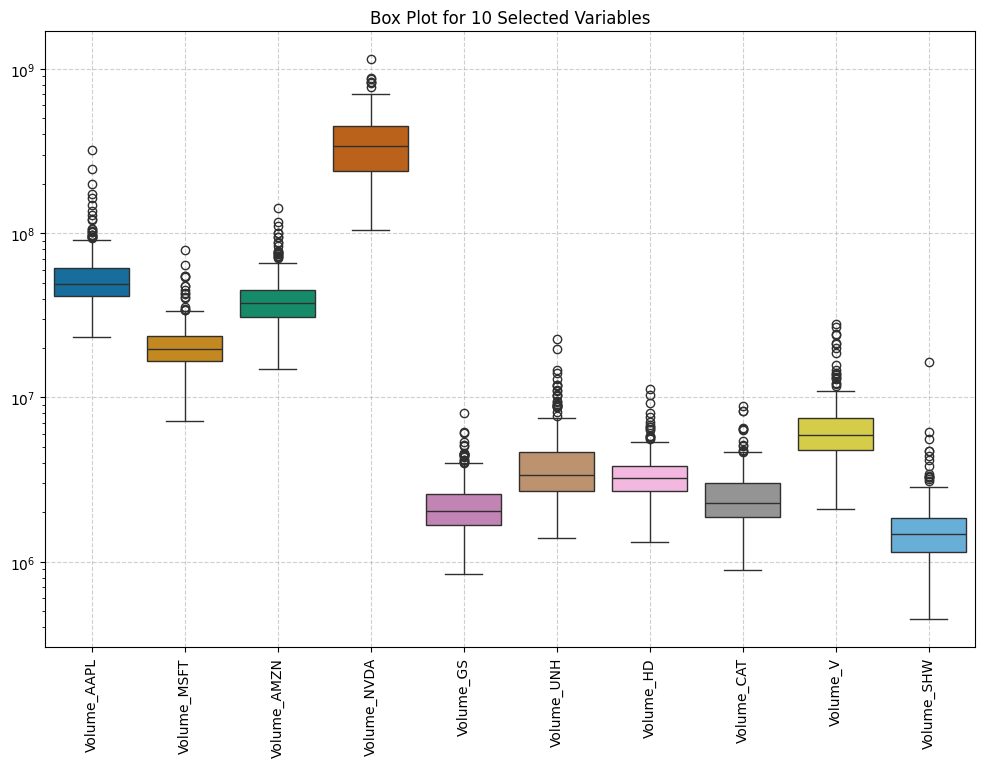

In [12]:
top_10_dow_jones_volume = [
    "Volume_AAPL",  # Apple Inc.
    "Volume_MSFT",  # Microsoft Corp.
    "Volume_AMZN",  # Amazon.com, Inc.
    "Volume_NVDA",  # NVIDIA Corporation
    "Volume_GS",    # Goldman Sachs Group Inc.
    "Volume_UNH",   # UnitedHealth Group Inc.
    "Volume_HD",    # Home Depot Inc.
    "Volume_CAT",   # Caterpillar Inc.
    "Volume_V",     # Visa Inc.
    "Volume_SHW"    # Sherwin-Williams Co.
]
# ✅ Plot the Box Plot for Selected Variables
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[top_10_dow_jones_volume],palette="colorblind")
plt.xticks(rotation=90)
plt.yscale("log") 
plt.title("Box Plot for 10 Selected Variables")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [13]:
print("Boxplot Volume comment 2:\n Here we see a better representation of the stocks.\n Additionaly we see that there are two distinct groups here.\n Group 1 is apple, microsoft, amazone, and nvidia - the high volume stocks.\n Group 2 is the remaining lower-volume stocks.")

Boxplot Volume comment 2:
 Here we see a better representation of the stocks.
 Additionaly we see that there are two distinct groups here.
 Group 1 is apple, microsoft, amazone, and nvidia - the high volume stocks.
 Group 2 is the remaining lower-volume stocks.


#### Variable distribution inspection

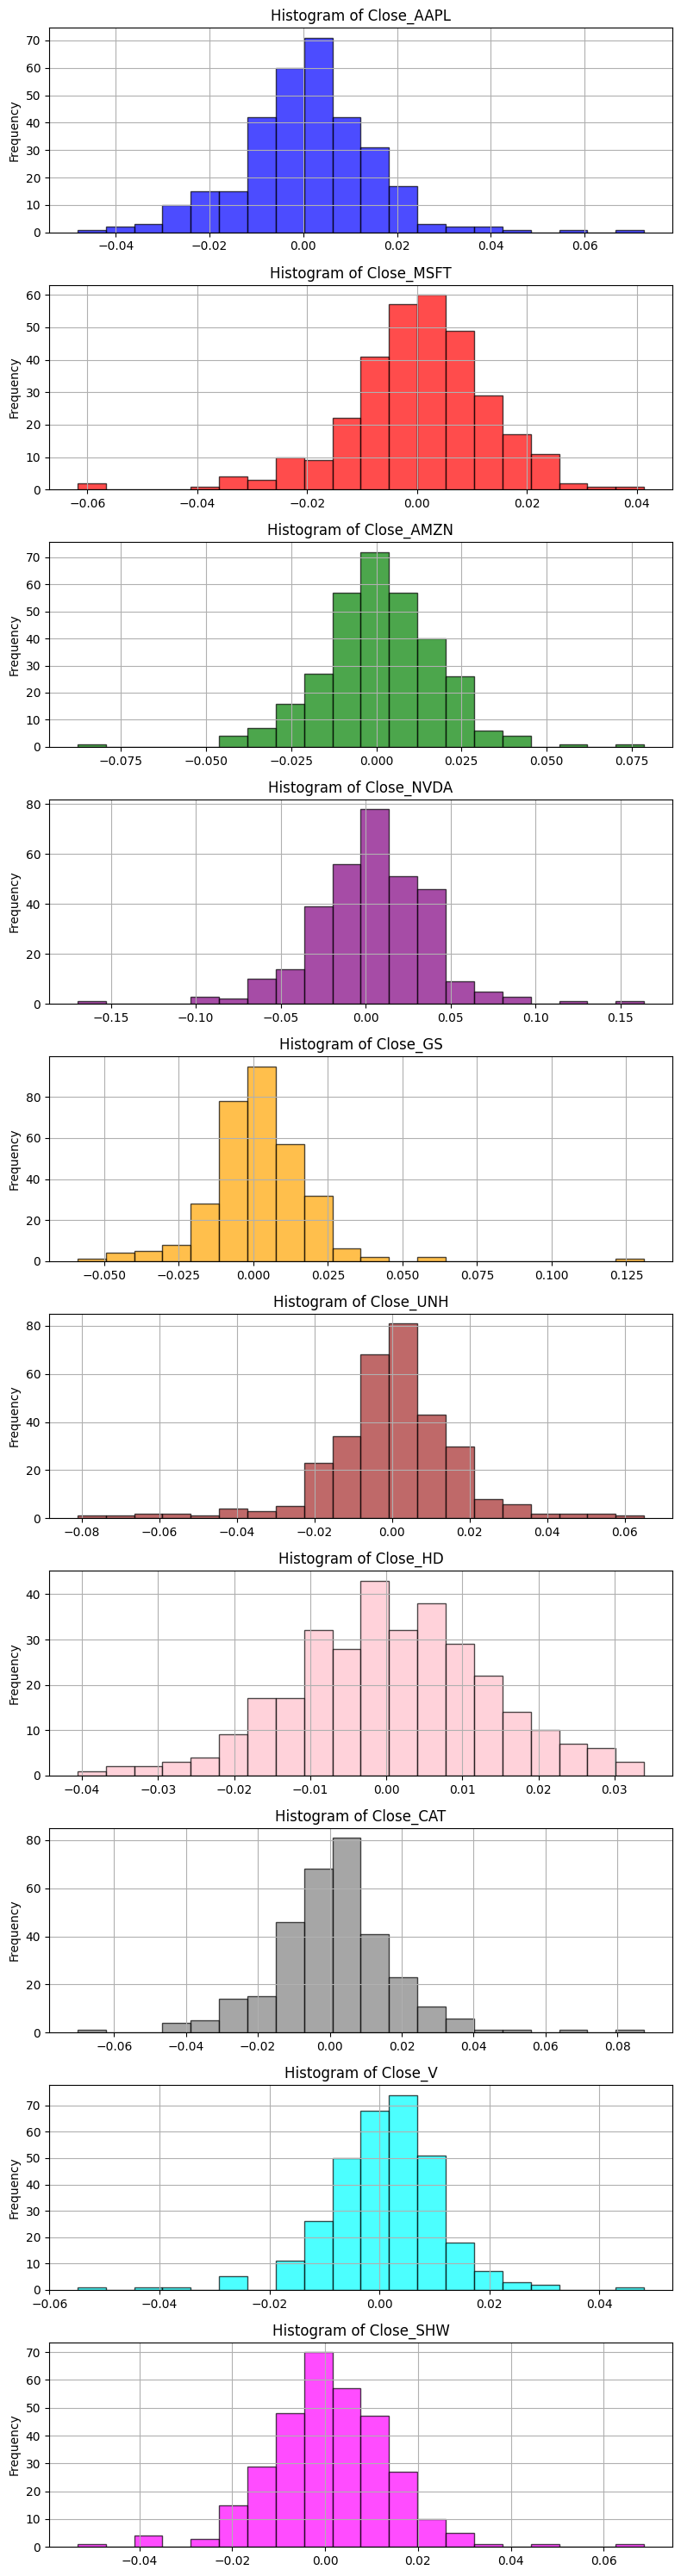

Interestingly, the distributions are not normal. but the Microsoft and Apple distributions are almost identical


In [14]:

top_10_dow_jones = [
    "Close_AAPL",  # Apple Inc.
    "Close_MSFT",  # Microsoft Corp.
    "Close_AMZN",  # Amazon.com, Inc.
    "Close_NVDA",  # NVIDIA Corporation
    "Close_GS",    # Goldman Sachs Group Inc.
    "Close_UNH",   # UnitedHealth Group Inc.
    "Close_HD",    # Home Depot Inc.
    "Close_CAT",   # Caterpillar Inc.
    "Close_V",     # Visa Inc.
    "Close_SHW"    # Sherwin-Williams Co.
]


# Select only a subset if too many columns
num_cols = len(top_10_dow_jones)  # Limit to 10 histograms
selected_columns = df[top_10_dow_jones]

# Create subplots (Limit figure height)
fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(8, min(num_cols * 3, 30)))

# Define different colors for each histogram
colors = ["blue", "red", "green", "purple", "orange", "brown", "pink", "gray", "cyan", "magenta"]

# Ensure axes is an iterable, even if only 1 subplot
if num_cols == 1:
    axes = [axes]

# Plot histograms for selected columns
for i, col in enumerate(selected_columns):
    axes[i].hist(df[col], bins=20, color=colors[i % len(colors)], alpha=0.7, edgecolor="black")
    axes[i].set_title(f"Histogram of {col}")
    axes[i].set_ylabel("Frequency")
    axes[i].grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()
print("Interestingly, the distributions are not normal. but the Microsoft and Apple distributions are almost identical")

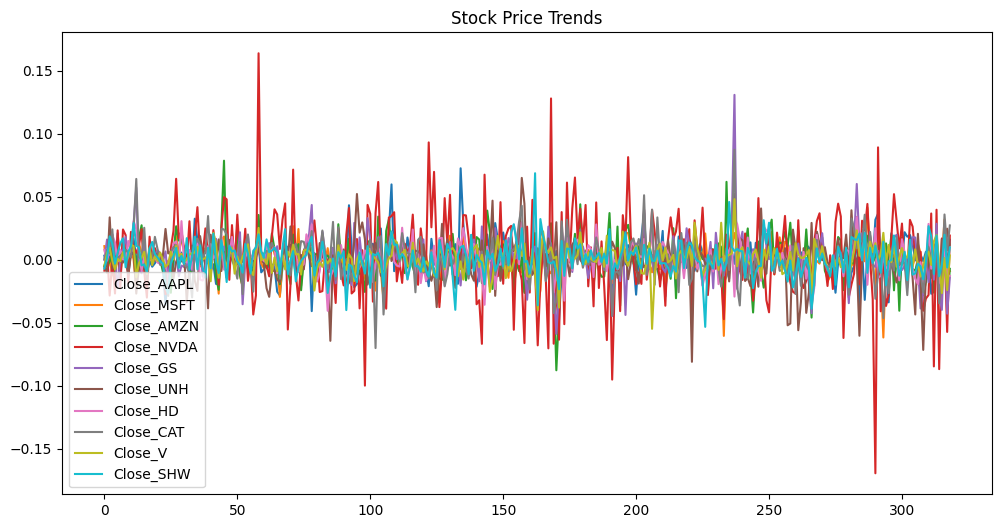

In [15]:
plt.figure(figsize=(12, 6))
for col in top_10_dow_jones:  # Replace with your columns
    plt.plot(df.index, df[col], label=col)
    
plt.legend()
plt.title("Stock Price Trends")
plt.show()

#### Average closing value for sector specific stocks

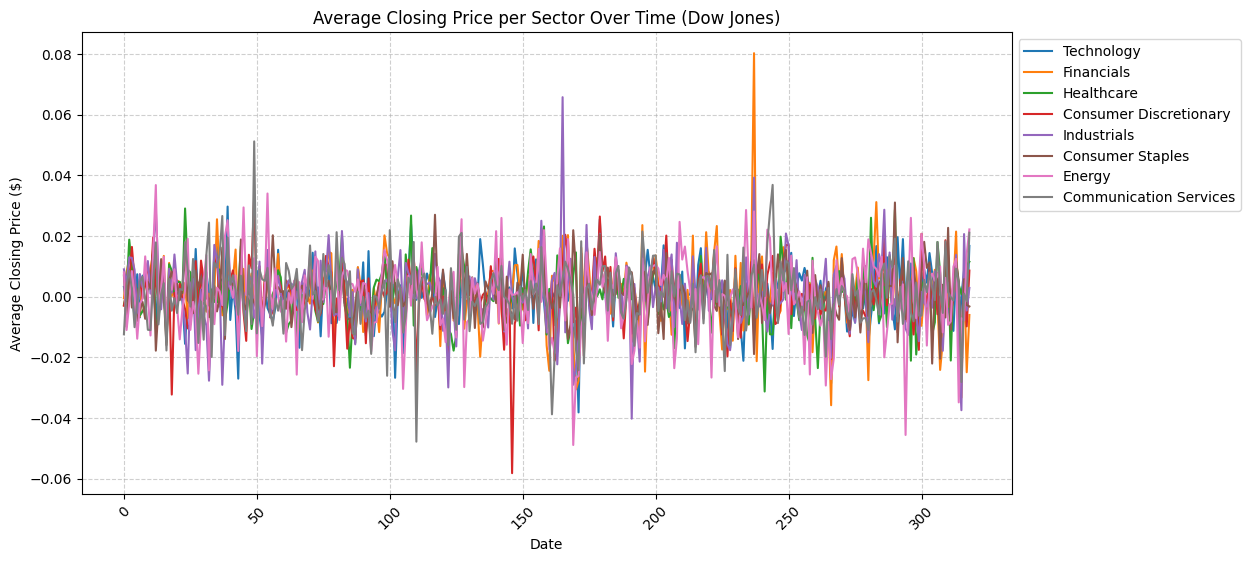

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sector Dictionary with Stock Tickers
sectors = {
    "Technology": ["AAPL", "MSFT", "CSCO", "INTC", "IBM"],
    "Financials": ["JPM", "GS", "AXP", "V", "TRV"],
    "Healthcare": ["UNH", "JNJ", "MRK", "AMGN", "PFE"],
    "Consumer Discretionary": ["HD", "MCD", "NKE", "DIS", "WBA"],
    "Industrials": ["BA", "CAT", "HON", "MMM", "RTX"],
    "Consumer Staples": ["PG", "KO", "WMT"],
    "Energy": ["CVX", "XOM"],
    "Communication Services": ["VZ", "DIS"],
    "Materials": ["DOW"]
}

# ✅ Calculate the Average Closing Price Per Sector Over Time
sector_avg_prices = pd.DataFrame(index=df.index)  # Initialize DataFrame with date index

for sector, tickers in sectors.items():
    # Create column names for closing prices
    close_columns = ["Close_" + ticker for ticker in tickers if "Close_" + ticker in df.columns]
    
    # Compute the sector's daily average closing price
    if close_columns:  # Ensure the columns exist in df
        sector_avg_prices[sector] = df[close_columns].mean(axis=1)  # Daily mean for sector

# ✅ Plot the Sector-Wise Average Closing Price Over Time
plt.figure(figsize=(12, 6))

for sector in sector_avg_prices.columns:
    plt.plot(sector_avg_prices.index, sector_avg_prices[sector], label=sector)

# ✅ Improve Readability
plt.xlabel("Date")
plt.ylabel("Average Closing Price ($)")
plt.title("Average Closing Price per Sector Over Time (Dow Jones)")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))  # Move legend outside
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

In [17]:
print("Line graph comment: \n- We see the rappid growth of industrials between 2017-18 and then hitting some kind of residual pattern.\n"
"- Then there is an initial dip in all prices in 2019, most likely due to the covid19 cirsis\n"
"- Thereafter we see a big crach in 2020, again most likely related to lockdowns")

Line graph comment: 
- We see the rappid growth of industrials between 2017-18 and then hitting some kind of residual pattern.
- Then there is an initial dip in all prices in 2019, most likely due to the covid19 cirsis
- Thereafter we see a big crach in 2020, again most likely related to lockdowns


### Time series trends - decomposition

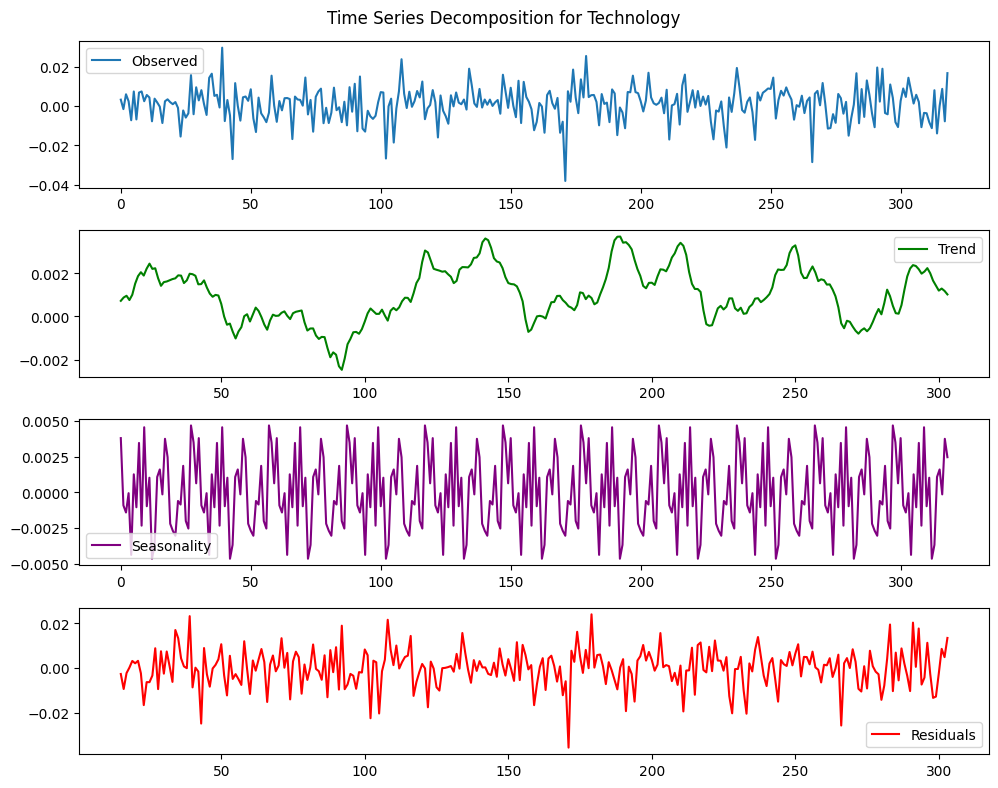

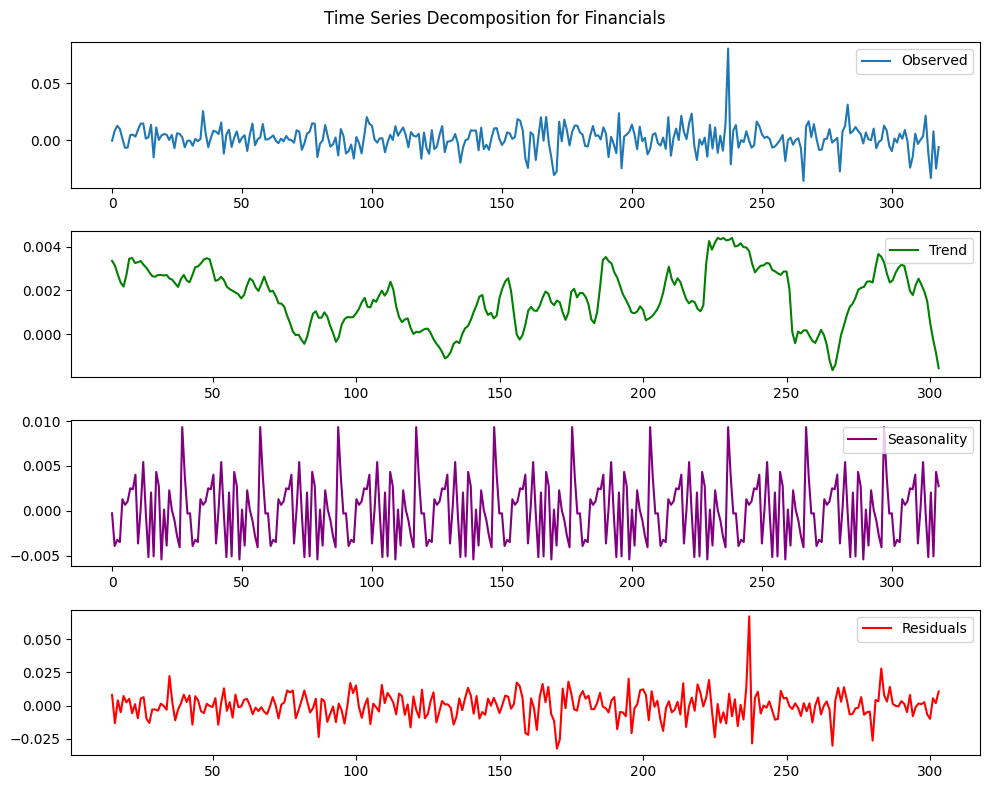

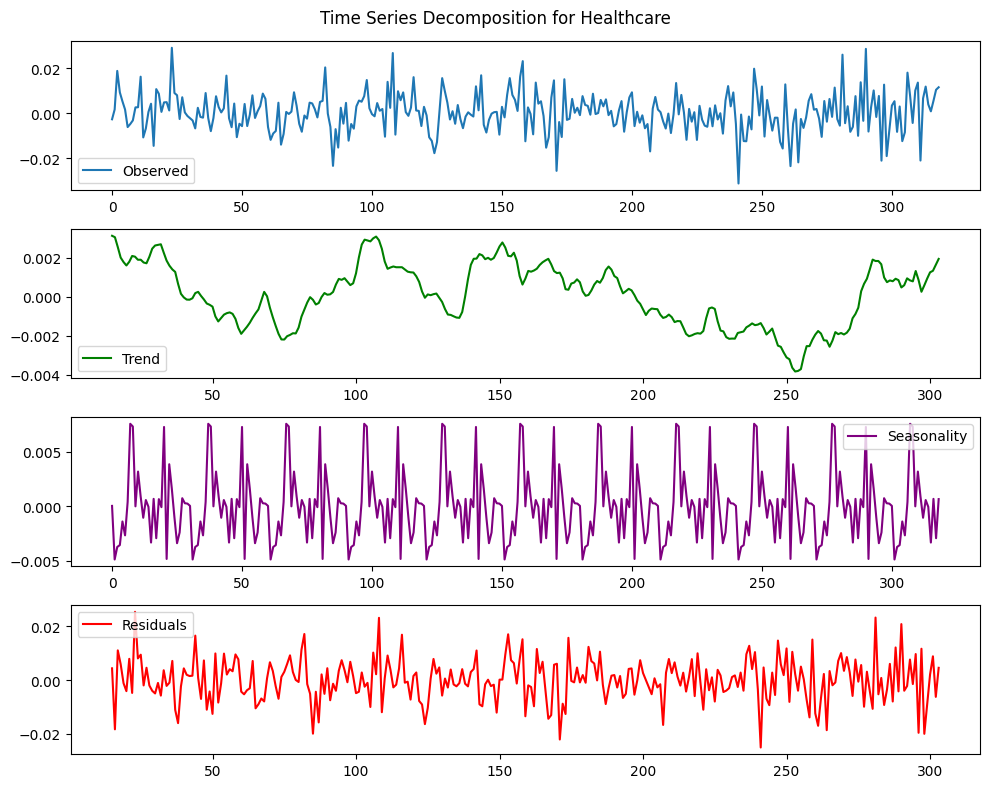

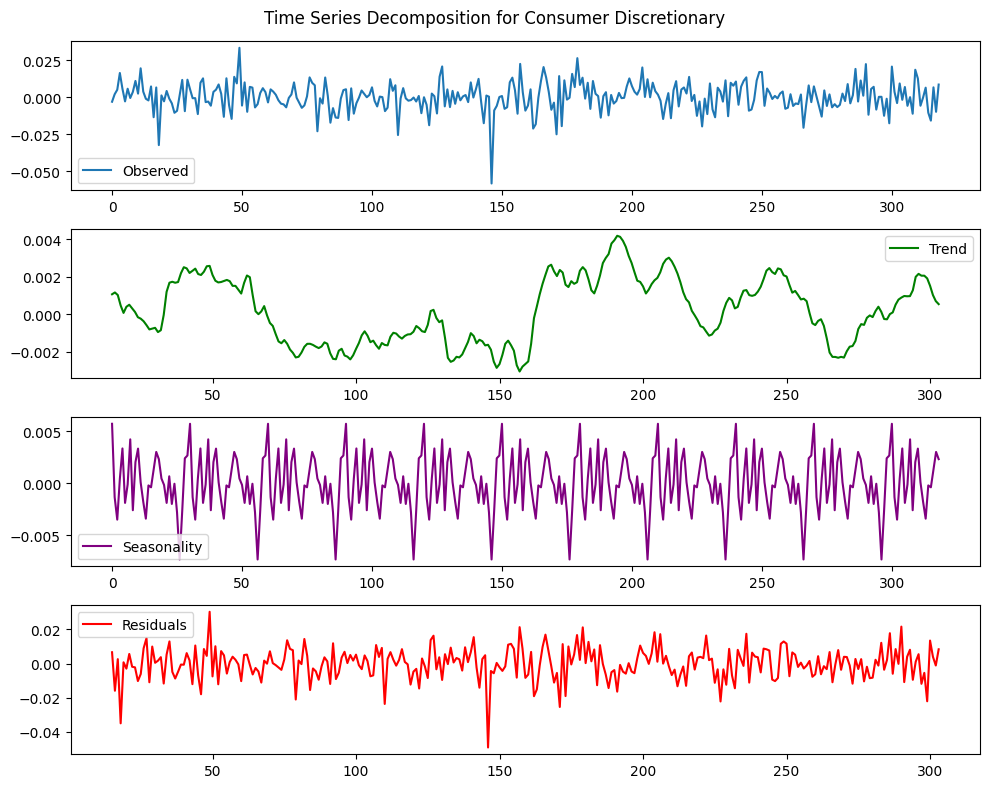

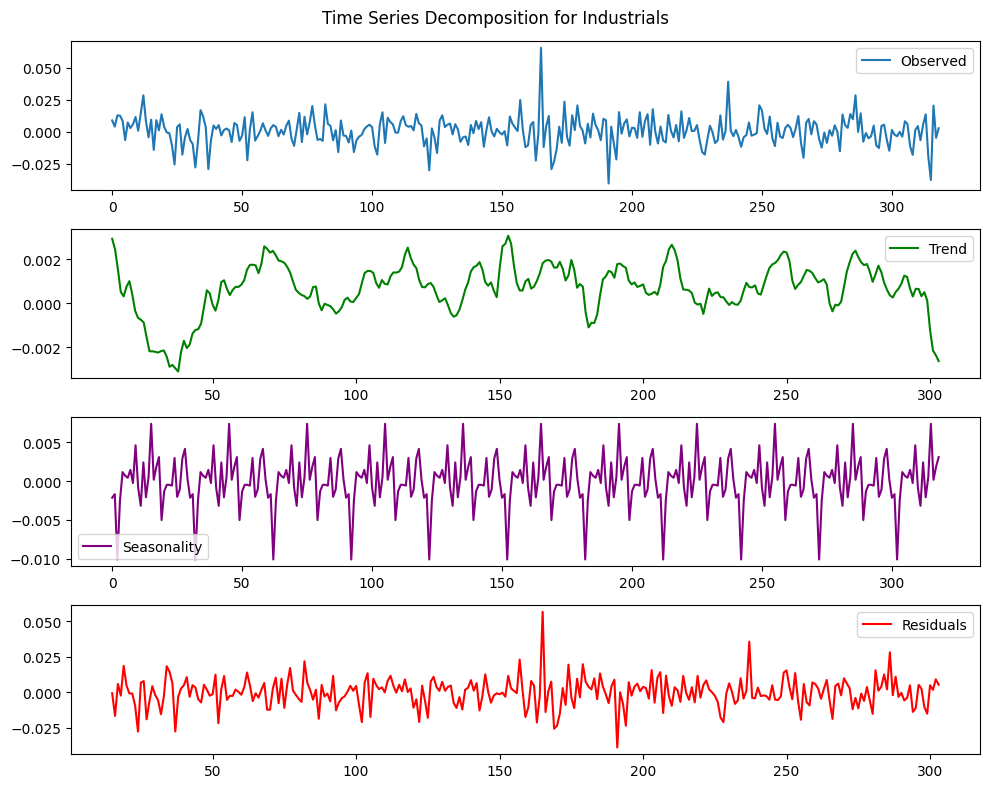

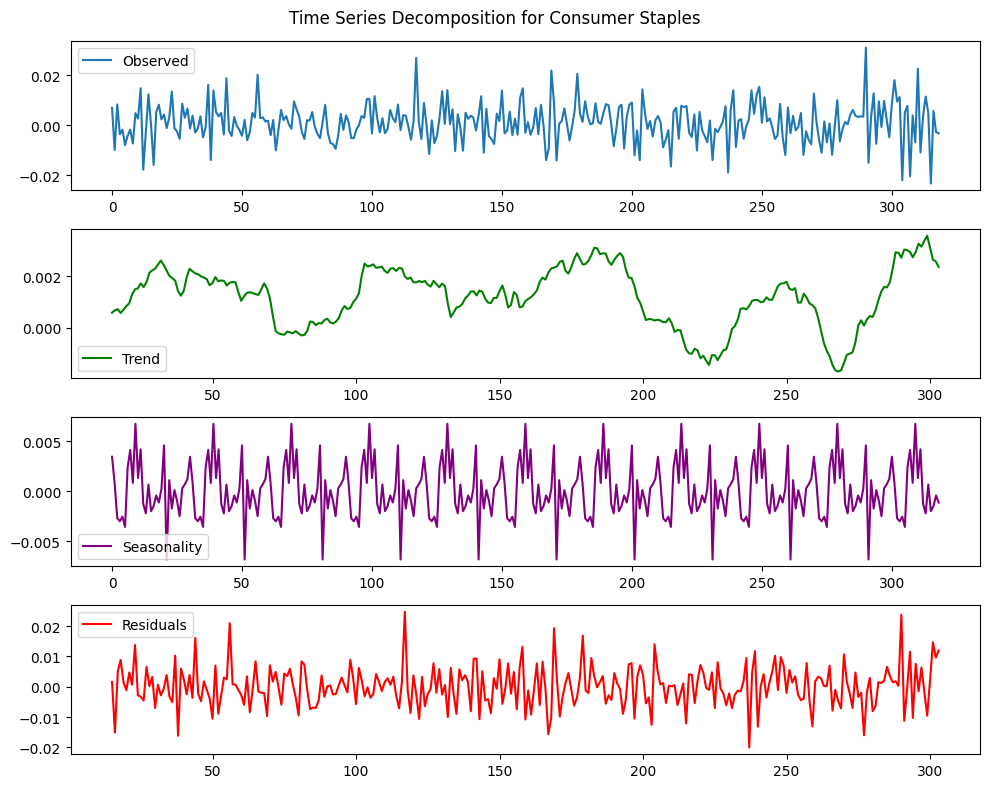

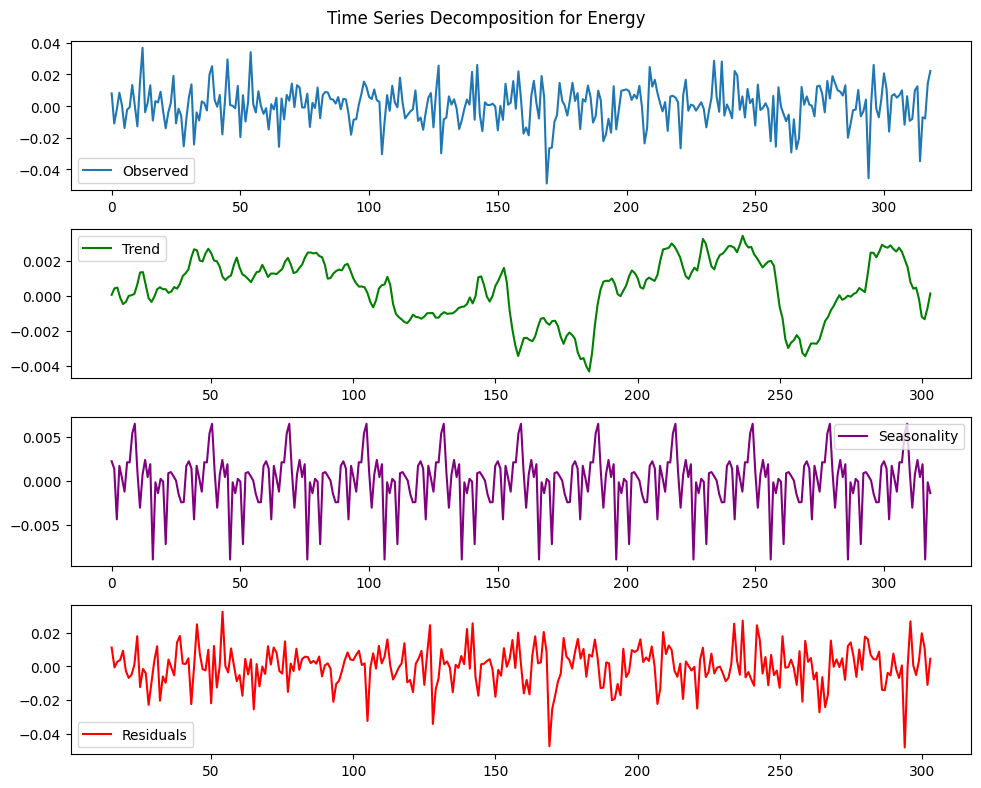

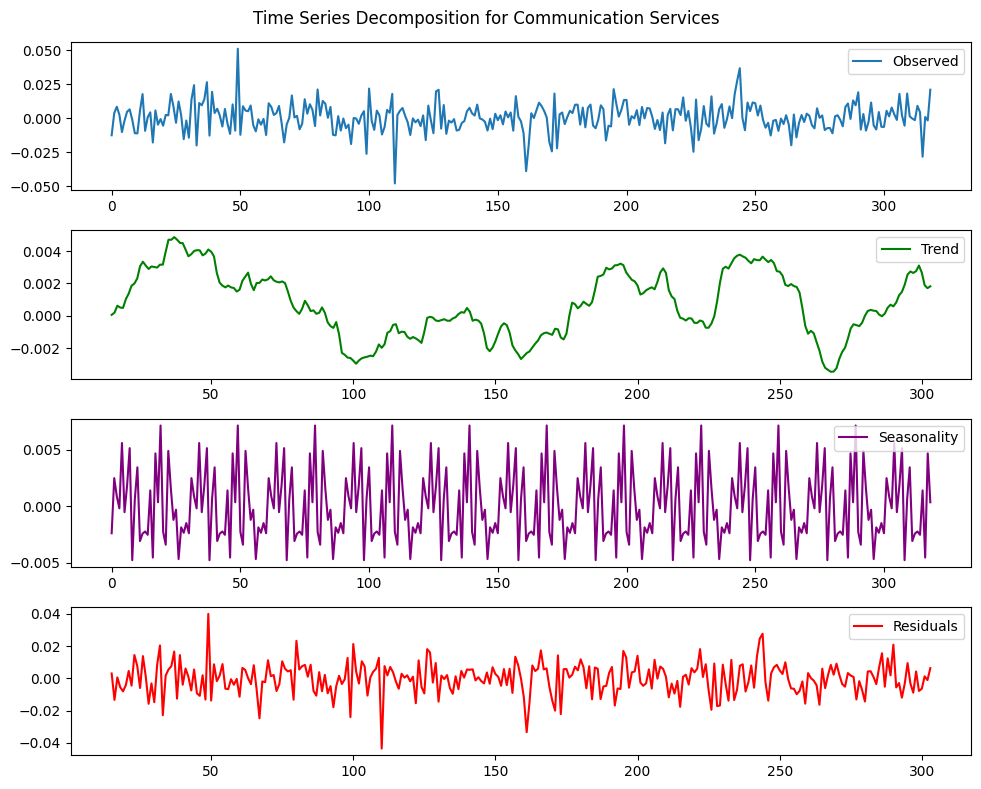

In [18]:
df_sectors = pd.DataFrame(index=df.index)
for sector_name, tickers in sectors.items():
    close_columns = [f"Close_{ticker}" for ticker in tickers if f"Close_{ticker}" in df.columns]
    if close_columns:
        df_sectors[sector_name] = df[close_columns].mean(axis=1)  # Compute daily mean per sector

for sector in df_sectors.columns:
    result = seasonal_decompose(df_sectors[sector], model='additive', period=30)
    
    # Plot decomposition
    plt.figure(figsize=(10, 8))
    plt.subplot(411)
    plt.plot(result.observed, label='Observed')
    plt.legend()
    plt.subplot(412)
    plt.plot(result.trend, label='Trend', color='green')
    plt.legend()
    plt.subplot(413)
    plt.plot(result.seasonal, label='Seasonality', color='purple')
    plt.legend()
    plt.subplot(414)
    plt.plot(result.resid, label='Residuals', color='red')
    plt.legend()
    plt.suptitle(f"Time Series Decomposition for {sector}")
    plt.tight_layout()
    plt.show()


In [19]:
print("Graph comment 2: From the decomposition we can see that most of the series is captured by the trend, with some very predictable seasonality, \n"
"and a general increase in residuals over time for all categories")

Graph comment 2: From the decomposition we can see that most of the series is captured by the trend, with some very predictable seasonality, 
and a general increase in residuals over time for all categories


### Correlation heatmap

### Stock over time graph

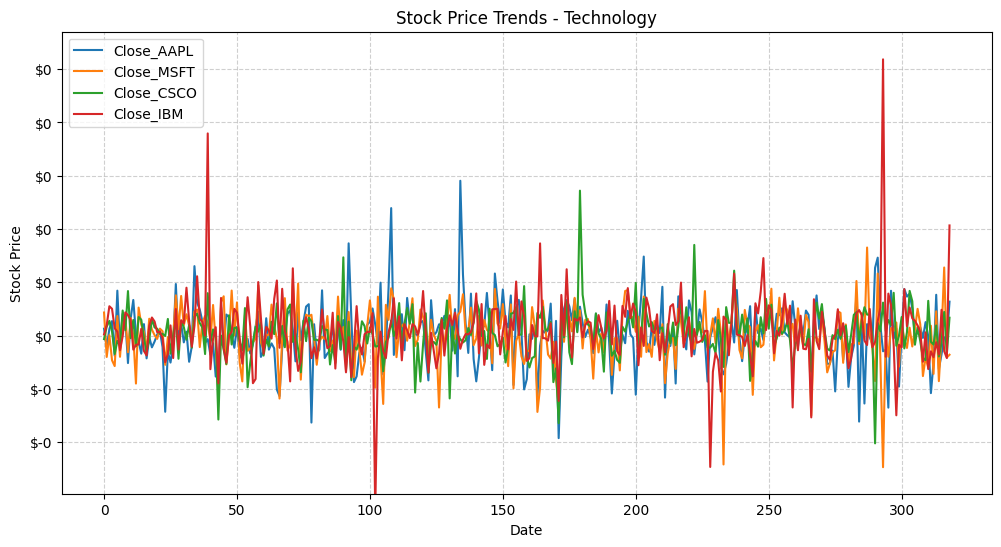

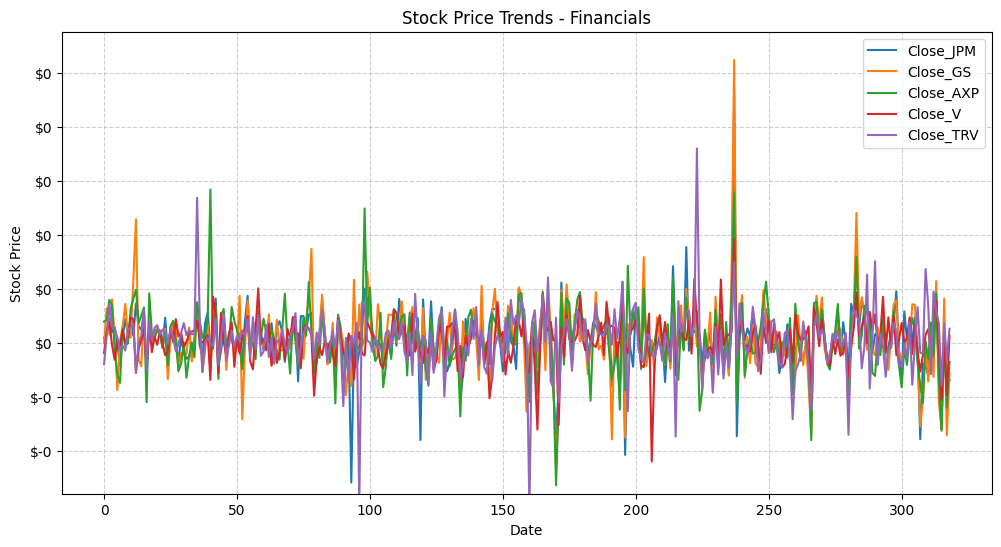

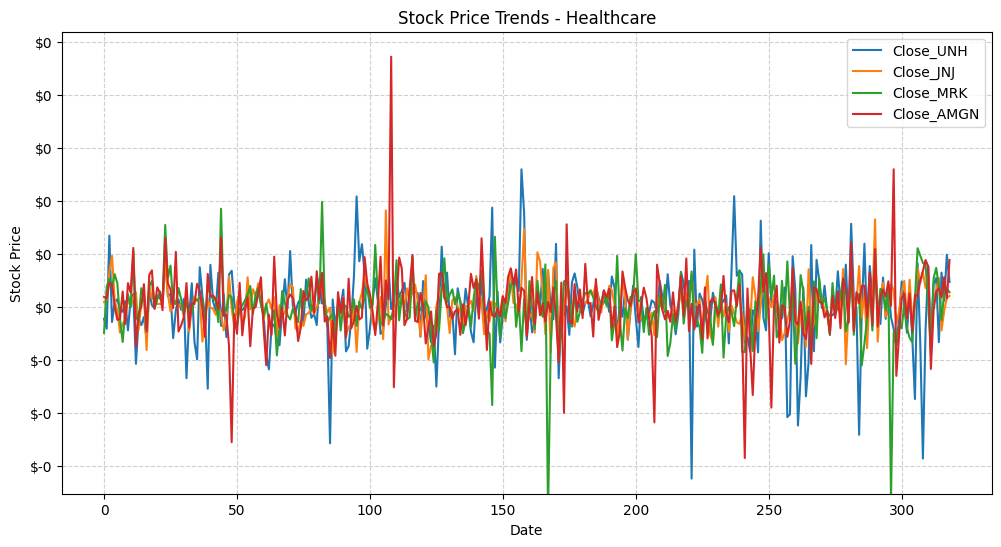

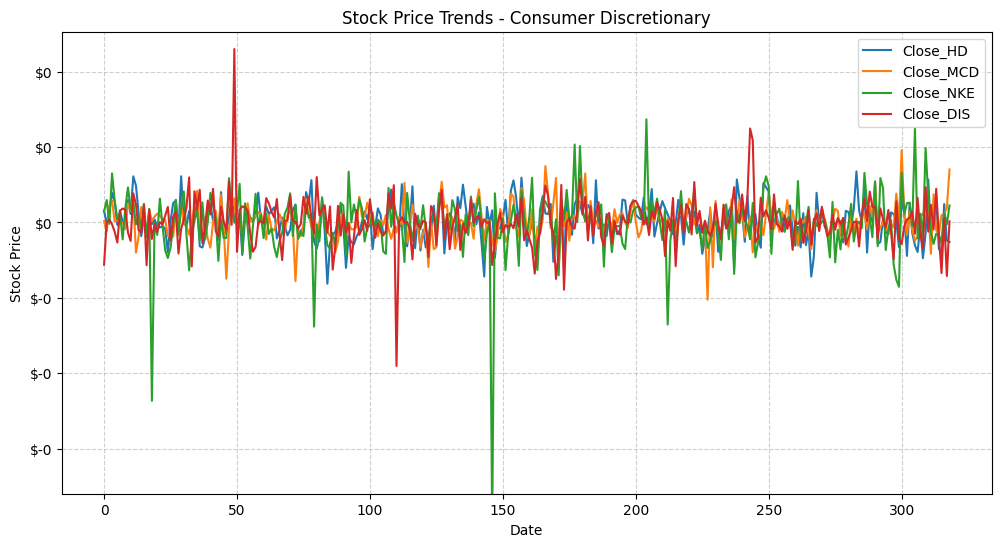

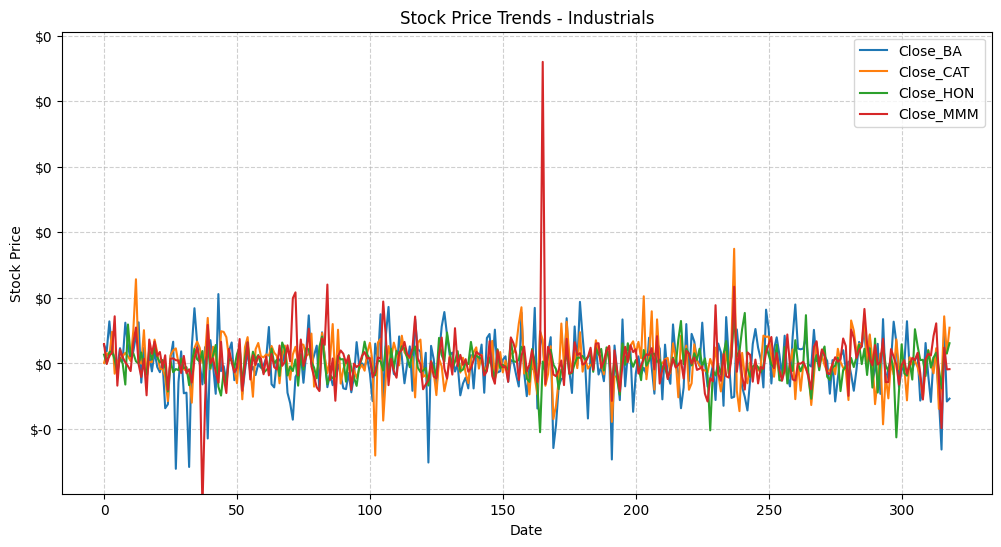

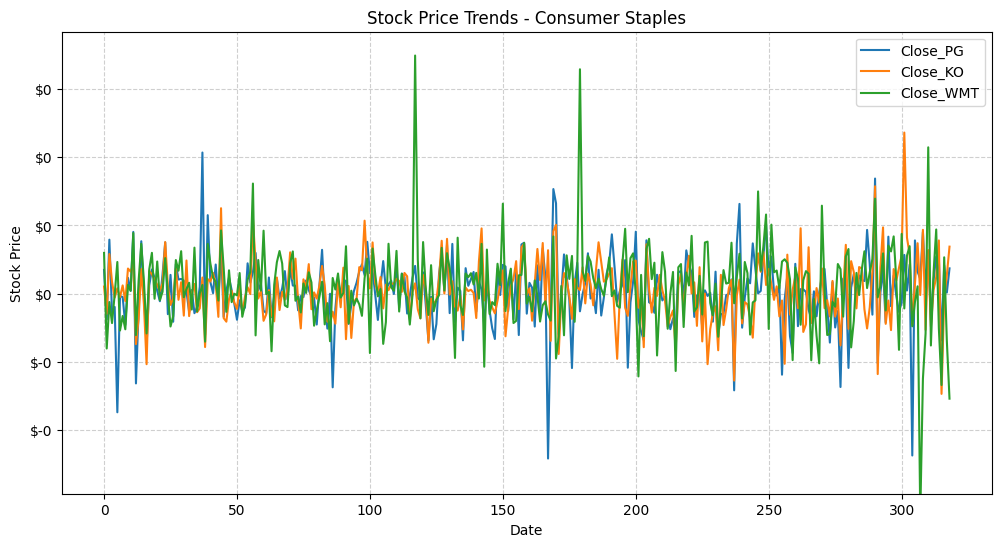

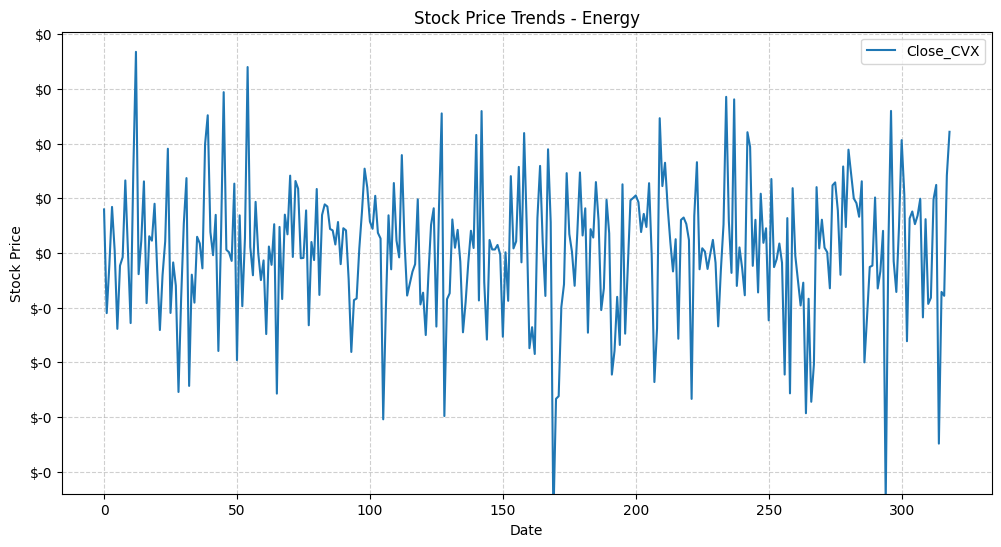

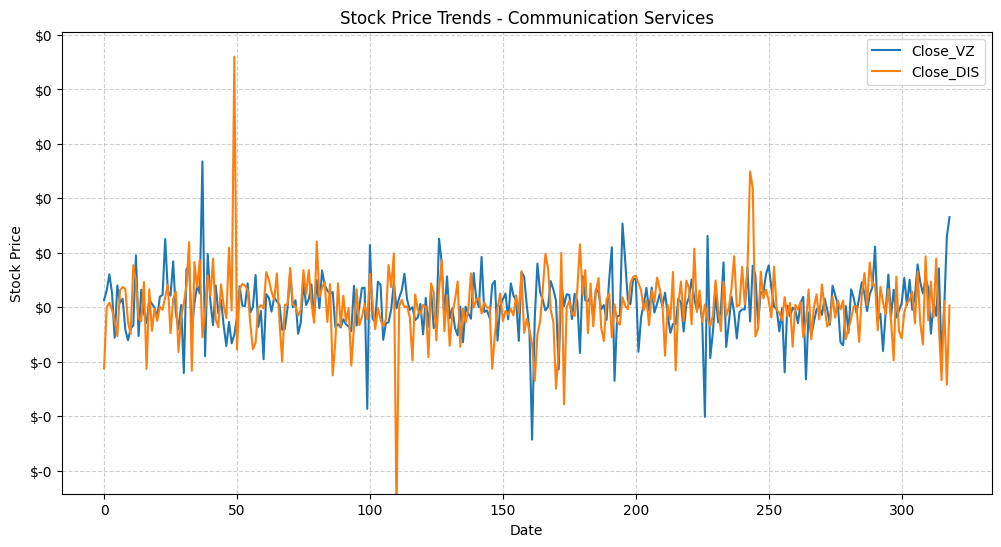

Skipping Materials (No Data Found)
Graph comments:
Tech stocks:
- As we see microsoft is the largest tech stock by far.
-Apple and IBM has been tracking eachother for some time, whilst Cisco has a more stable low price.
Financial stocks:
-We see that goldman sachs having the highest stock price of the DJI financial companies.
- Additionally, we see that the rest of the financial stocks are more or less tracking at the same price, and have fewer peaks than the other stocks.


In [20]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Sector Lists
sectors = {
    "Technology": ["AAPL", "MSFT", "CSCO", "INTC", "IBM"],
    "Financials": ["JPM", "GS", "AXP", "V", "TRV"],
    "Healthcare": ["UNH", "JNJ", "MRK", "AMGN", "PFE"],
    "Consumer Discretionary": ["HD", "MCD", "NKE", "DIS", "WBA"],
    "Industrials": ["BA", "CAT", "HON", "MMM", "RTX"],
    "Consumer Staples": ["PG", "KO", "WMT"],
    "Energy": ["CVX", "XOM"],
    "Communication Services": ["VZ", "DIS"],
    "Materials": ["DOW"]
}

# Loop Through Each Sector & Plot Stock Prices
for sector_name, tickers in sectors.items():
    stock_columns = ["Close_" + ticker for ticker in tickers if "Close_" + ticker in df.columns]  # Ensure valid columns

    # Skip sector if no valid data available
    if not stock_columns:
        print(f"Skipping {sector_name} (No Data Found)")
        continue

    df_sector = df[stock_columns]  # Select key stock columns

    # Plot Stock Prices
    plt.figure(figsize=(12, 6))

    for col in df_sector.columns:
        plt.plot(df_sector.index, df_sector[col], label=col)

    # ✅ Set Y-Axis Scale for Better Readability
    plt.ylim(df_sector.min().min() * 0.9, df_sector.max().max() * 1.1)  # Slightly pad min/max

    # ✅ Format Y-Axis to Show Readable Large Numbers
    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f"${x:,.0f}"))

    # ✅ Add Grid & Labels
    plt.legend()
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.title(f"Stock Price Trends - {sector_name}")
    plt.grid(True, linestyle="--", alpha=0.6)

    # Show the Plot
    plt.show()
print("Graph comments:\n"
"Tech stocks:\n"
"- As we see microsoft is the largest tech stock by far.\n"
"-Apple and IBM has been tracking eachother for some time, whilst Cisco has a more stable low price.\n"
"Financial stocks:\n"
"-We see that goldman sachs having the highest stock price of the DJI financial companies.\n"
"- Additionally, we see that the rest of the financial stocks are more or less tracking at the same price, and have fewer peaks than the other stocks.")
